# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
some_digit = X[35999]
some_digit_image = some_digit.reshape(28, 28)

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

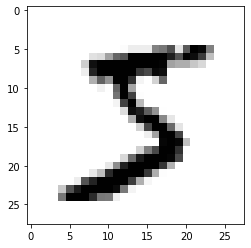

In [5]:
import matplotlib.pyplot as plt
import matplotlib
plt.imshow(X[0,:].reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest" )
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

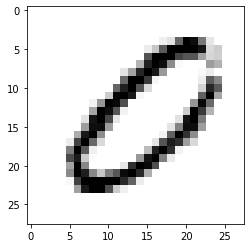

In [6]:
plt.imshow(X[35999,:].reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest" )
plt.show()
#yes its the same

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

y_train_5 = (y_train==5)
y_test_5 = (y_test==5) 

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(tol=0.1,solver = 'lbfgs')
logisticRegr.fit(X_train, y_train_5)

C:\Users\sudis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [44]:
logisticRegr.predict([some_digit])
test_predictions = logisticRegr.predict(X_test)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [46]:
never_5_clf.fit(X_train, y_train_5)
test_predictions1 = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [67]:
#Accuracy Score
from sklearn.metrics import accuracy_score

print("Logistic Regression:", accuracy_score(y_test_5, test_predictions))
print("Never5 Classifier:", accuracy_score(y_test_5, test_predictions1))

Logistic Regression: 0.9779
Never5 Classifier: 0.9108


In [68]:
#Precision Score
from sklearn.metrics import precision_score

print("Logistic Regression:", precision_score(y_test_5, test_predictions, average=None))
print("Never5 Classifier:", precision_score(y_test_5, test_predictions1, average=None))

Logistic Regression: [0.98398867 0.90964591]
Never5 Classifier: [0.9108 0.    ]


C:\Users\sudis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
#recall_score
from sklearn.metrics import recall_score
print("Logistic Regression:", recall_score(y_test_5, test_predictions, average=None))
print("Never5 Classifier:", recall_score(y_test_5, test_predictions1, average=None))

Logistic Regression: [0.99187527 0.83520179]
Never5 Classifier: [1. 0.]


In [70]:
#f1_score
from sklearn.metrics import f1_score
print("Logistic Regression:", f1_score(y_test_5, test_predictions, average=None))
print("Never5 Classifier:", f1_score(y_test_5, test_predictions1, average=None))

Logistic Regression: [0.98791623 0.87083577]
Never5 Classifier: [0.95331798 0.        ]


In [33]:
#Confusion matrix for logistic regression
from sklearn import metrics
predictions = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test_5, y_pred = predictions, labels =logisticRegr.classes_)
cm

array([[9034,   74],
       [ 147,  745]], dtype=int64)

In [51]:
predictions1 = never_5_clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test_5, y_pred = predictions1, labels =logisticRegr.classes_)
cm

array([[9108,    0],
       [ 892,    0]], dtype=int64)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# First model gets all the values with a better accuracy score but Second model has no negatives values with lesser accuracy


### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

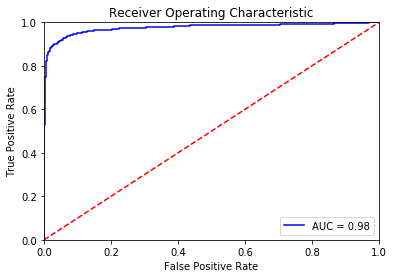

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
probs = logisticRegr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_5, preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


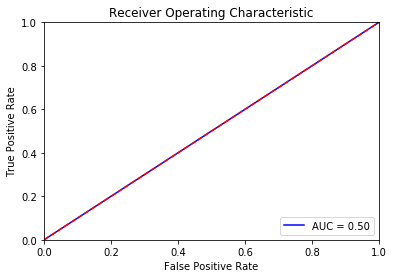

In [63]:
probs = logisticRegr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_5, test_predictions1)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [64]:
roc_auc_score(y_test_5, preds)

0.9760923231141597

In [65]:
roc_auc_score(y_test_5, test_predictions1)

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
#97% under AOC is pretty good, 50% means its the minimum so the second model is not really good